<a id='start'></a>
# Exploring

In this Kernel I use part of the functions and methods introduced in previous notebooks; later I present the main graphs that can be done in Python. <br>
There are several libraries that can be used to create graphics in Python, the main ones we will use in this notebook are: <br>
- MatPlotLib: https://matplotlib.org/tutorials/index.html <br>
- Seaborn: https://seaborn.pydata.org/<br>

<br>
Inside the notebook I will use different datasets; the first one we will use will be the Titanic dataset, on which it will be necessary to make some manipulations before creating the charts. <br>
The notebook is divided into the following parts: <br>

1) [Data preparation](#section1)<a href='#section1'></a>

2) [Plotting, Visualizing and Analyzing Data](#section2)<a href='#section2'></a>: <br>
- Bar chart
- Histrogram
- 2D Scatter Plot
- 3D Scatter Plot
- Higher Dimensionality Visualizations
        1) Parallel Coordinates
        2) Andrew's Curves
        3) Imshow


In [1]:
# I'm importing the libraries I'll need in the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math
import statistics
import seaborn as sns

# To build the parallel coordinates
from pandas.plotting import parallel_coordinates
from pandas.plotting import andrews_curves
from sklearn.datasets import load_iris


from mpl_toolkits.mplot3d import Axes3D # for 3D charts
from numpy import inf
from scipy import stats
from statistics import median

matplotlib.pyplot.style.use('ggplot')

<a id='section1'></a>
## 1) Data preparation
In this section amount the dataset of the Titanic's passengers, I make corrections in order to make the graphical analysis later.

In [2]:
# We import the training dataset of the titanic
train_dataset = pd.read_csv("train.csv")
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print ("Matrix row and column dimensions 'train_dataset':", train_dataset.shape)

Matrix row and column dimensions 'train_dataset': (891, 12)


We count the number of missing values for each attribute of the dataset

In [4]:
train_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
print("The", round(train_dataset.Age.isnull().sum()/891,2)*100, "% of records has a missing value in the 'Age'")
print("The", round(train_dataset.Cabin.isnull().sum()/891,2)*100, "% of records has a missing value in the 'Cabin'")

The 20.0 % of records has a missing value in the 'Age'
The 77.0 % of records has a missing value in the 'Cabin'


Since the field 'Cabin' has mostly missing values and it is not possible to reconstruct them, I decide to delete the field from the dataset:

In [6]:
train_dataset = train_dataset.drop(labels=['Cabin'], axis=1)

I capture passengers where the 'Age' and 'Embarked' camp is null and void.

In [7]:
Passenger_AgeNull = train_dataset.loc[train_dataset.Age.isnull()]
Passenger_EmbarkedNull = train_dataset.loc[train_dataset.Embarked.isnull()]

we can create the bar graph showing the number of people with the field 'Age' null, who have survived and not: <br>

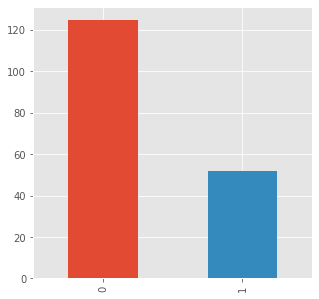

In [8]:
# Let's create the bar chart of people with zero age field
%matplotlib inline

# I count the different types of the 'Survived' field, in this case the field can only assume a value of 1 (survived) or 0 (not survived).
count = Passenger_AgeNull['Survived'].value_counts() 

fig = plt.figure(figsize=(5,5)) # define plot area
ax = fig.gca() # define axis    

count.plot.bar()

<BarContainer object of 2 artists>

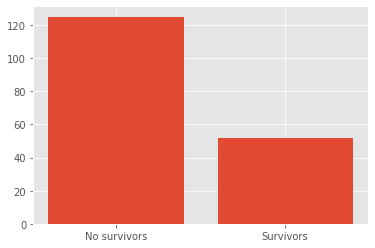

In [9]:
# Another way to make a bar chart can be as follows
# In this case it is possible to assign names to categories 1, 0
plt.bar(['No survivors', 'Survivors'], count)

It is not possible to delete passengers whose age we do not know because they can help to distinguish between surviving and non surviving passengers; to better understand possible patterns I create histograms in the same area (**FacetGrid**), clustering people's age according to age and gender. <br>
For this chart I use the Seaborn library imported at the beginning of the workbook (https://seaborn.pydata.org/examples/faceted_histogram.html).

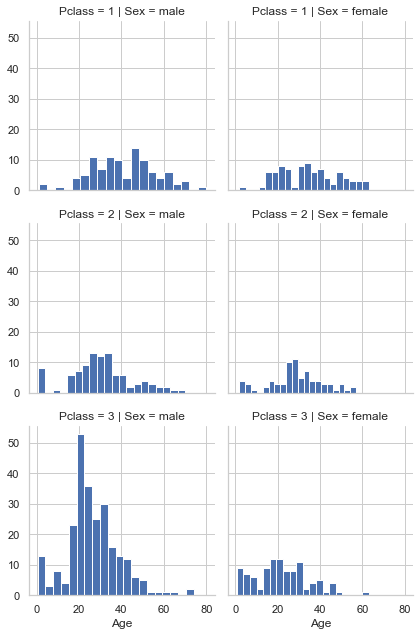

In [10]:
# Draw a nested histogram to show Age for class and sex
sns.set(style="whitegrid")

g = sns.FacetGrid(train_dataset, row="Pclass", col="Sex")
g.map(plt.hist, "Age", bins=20)

I replace the missing values of the age field by entering the median age of the passengers by gender, class they were travelling in and based on the value assumed by the 'Survived' field.

In [11]:
train_dataset.loc[ (train_dataset.Pclass == 1) & (train_dataset.Sex == "female") & (train_dataset.Survived == 1) & (train_dataset.Age.isnull()), "Age" ] = train_dataset.loc[ (train_dataset.Pclass == 1) & (train_dataset.Sex == "female") & (train_dataset.Survived == 1) & (train_dataset.Age.isnull()), "Age" ].fillna(train_dataset.loc[ (train_dataset.Pclass == 1) & (train_dataset.Sex == "female") & (train_dataset.Survived == 1) ]["Age"].median())
train_dataset.loc[ (train_dataset.Pclass == 2) & (train_dataset.Sex == "female") & (train_dataset.Survived == 1) & (train_dataset.Age.isnull()), "Age" ] = train_dataset.loc[ (train_dataset.Pclass == 2) & (train_dataset.Sex == "female") & (train_dataset.Survived == 1) & (train_dataset.Age.isnull()), "Age" ].fillna(train_dataset.loc[ (train_dataset.Pclass == 2) & (train_dataset.Sex == "female") & (train_dataset.Survived == 1) ]["Age"].median())
train_dataset.loc[ (train_dataset.Pclass == 3) & (train_dataset.Sex == "female") & (train_dataset.Survived == 1) & (train_dataset.Age.isnull()), "Age" ] = train_dataset.loc[ (train_dataset.Pclass == 3) & (train_dataset.Sex == "female") & (train_dataset.Survived == 1) & (train_dataset.Age.isnull()), "Age" ].fillna(train_dataset.loc[ (train_dataset.Pclass == 3) & (train_dataset.Sex == "female") & (train_dataset.Survived == 1) ]["Age"].median())
train_dataset.loc[ (train_dataset.Pclass == 1) & (train_dataset.Sex == "female") & (train_dataset.Survived == 0) & (train_dataset.Age.isnull()), "Age" ] = train_dataset.loc[ (train_dataset.Pclass == 1) & (train_dataset.Sex == "female") & (train_dataset.Survived == 0) & (train_dataset.Age.isnull()), "Age" ].fillna(train_dataset.loc[ (train_dataset.Pclass == 1) & (train_dataset.Sex == "female") & (train_dataset.Survived == 0) ]["Age"].median())
train_dataset.loc[ (train_dataset.Pclass == 2) & (train_dataset.Sex == "female") & (train_dataset.Survived == 0) & (train_dataset.Age.isnull()), "Age" ] = train_dataset.loc[ (train_dataset.Pclass == 2) & (train_dataset.Sex == "female") & (train_dataset.Survived == 0) & (train_dataset.Age.isnull()), "Age" ].fillna(train_dataset.loc[ (train_dataset.Pclass == 2) & (train_dataset.Sex == "female") & (train_dataset.Survived == 0) ]["Age"].median())
train_dataset.loc[ (train_dataset.Pclass == 3) & (train_dataset.Sex == "female") & (train_dataset.Survived == 0) & (train_dataset.Age.isnull()), "Age" ] = train_dataset.loc[ (train_dataset.Pclass == 3) & (train_dataset.Sex == "female") & (train_dataset.Survived == 0) & (train_dataset.Age.isnull()), "Age" ].fillna(train_dataset.loc[ (train_dataset.Pclass == 3) & (train_dataset.Sex == "female") & (train_dataset.Survived == 0) ]["Age"].median())
train_dataset.loc[ (train_dataset.Pclass == 1) & (train_dataset.Sex == "male") & (train_dataset.Survived == 1) & (train_dataset.Age.isnull()), "Age" ] = train_dataset.loc[ (train_dataset.Pclass == 1) & (train_dataset.Sex == "male") & (train_dataset.Survived == 1) & (train_dataset.Age.isnull()), "Age" ].fillna(train_dataset.loc[ (train_dataset.Pclass == 1) & (train_dataset.Sex == "male") & (train_dataset.Survived == 1) ]["Age"].median())
train_dataset.loc[ (train_dataset.Pclass == 2) & (train_dataset.Sex == "male") & (train_dataset.Survived == 1) & (train_dataset.Age.isnull()), "Age" ] = train_dataset.loc[ (train_dataset.Pclass == 2) & (train_dataset.Sex == "male") & (train_dataset.Survived == 1) & (train_dataset.Age.isnull()), "Age" ].fillna(train_dataset.loc[ (train_dataset.Pclass == 2) & (train_dataset.Sex == "male") & (train_dataset.Survived == 1) ]["Age"].median())
train_dataset.loc[ (train_dataset.Pclass == 3) & (train_dataset.Sex == "male") & (train_dataset.Survived == 1) & (train_dataset.Age.isnull()), "Age" ] = train_dataset.loc[ (train_dataset.Pclass == 3) & (train_dataset.Sex == "male") & (train_dataset.Survived == 1) & (train_dataset.Age.isnull()), "Age" ].fillna(train_dataset.loc[ (train_dataset.Pclass == 3) & (train_dataset.Sex == "male") & (train_dataset.Survived == 1) ]["Age"].median())
train_dataset.loc[ (train_dataset.Pclass == 1) & (train_dataset.Sex == "male") & (train_dataset.Survived == 0) & (train_dataset.Age.isnull()), "Age" ] = train_dataset.loc[ (train_dataset.Pclass == 1) & (train_dataset.Sex == "male") & (train_dataset.Survived == 0) & (train_dataset.Age.isnull()), "Age" ].fillna(train_dataset.loc[ (train_dataset.Pclass == 1) & (train_dataset.Sex == "male") & (train_dataset.Survived == 0) ]["Age"].median())
train_dataset.loc[ (train_dataset.Pclass == 2) & (train_dataset.Sex == "male") & (train_dataset.Survived == 0) & (train_dataset.Age.isnull()), "Age" ] = train_dataset.loc[ (train_dataset.Pclass == 2) & (train_dataset.Sex == "male") & (train_dataset.Survived == 0) & (train_dataset.Age.isnull()), "Age" ].fillna(train_dataset.loc[ (train_dataset.Pclass == 2) & (train_dataset.Sex == "male") & (train_dataset.Survived == 0) ]["Age"].median())
train_dataset.loc[ (train_dataset.Pclass == 3) & (train_dataset.Sex == "male") & (train_dataset.Survived == 0) & (train_dataset.Age.isnull()), "Age" ] = train_dataset.loc[ (train_dataset.Pclass == 3) & (train_dataset.Sex == "male") & (train_dataset.Survived == 0) & (train_dataset.Age.isnull()), "Age" ].fillna(train_dataset.loc[ (train_dataset.Pclass == 3) & (train_dataset.Sex == "male") & (train_dataset.Survived == 0) ]["Age"].median())

TODO: Can you create a function that does this together?

At this point we just need to fill in the missing values for the 'Embarked' field

In [12]:
train_dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [13]:
Passenger_EmbarkedNull

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


To assign the value to the 'Embarked' field we perform further analysis on the dataset

Text(0.5, 1.0, 'Bar Chart of Embarked')

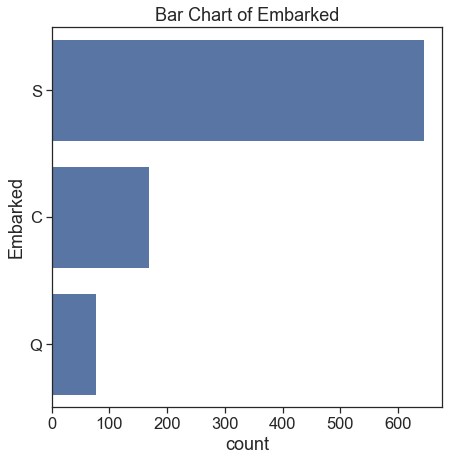

In [7]:
# We count the people who boarded in the three different locations (S - Southampton, C - Cherbourg, Q - Queenstown) #
df = train_dataset

# Grouped boxplot
sns.set(font_scale = 1.50)
sns.set_style("ticks")

fig, ax = plt.subplots(figsize=(7, 7))
graph = sns.countplot(y="Embarked", data=df, ax = ax, color="b")
#graph.set_xticklabels(graph.get_xticklabels(), rotation='vertical')
graph.set_title('Bar Chart of Embarked')


It seems that most people have embarked from S (Southampton), but where did the first class women mainly embarked from (characteristic of the women we have noticed have the value of the 'Embarked' camp zero)?

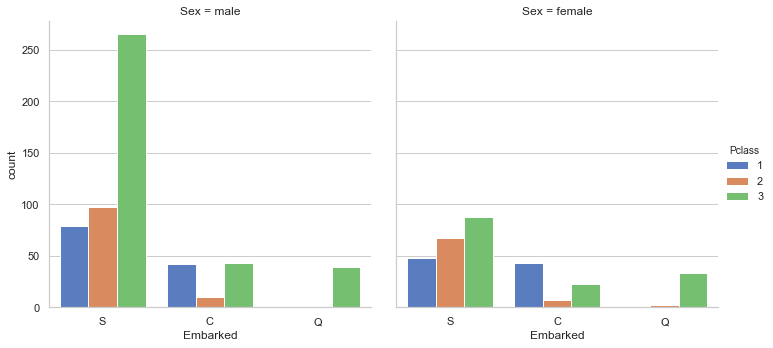

In [15]:
# Draw a nested barplot to show embarked for class and sex
sns.set(style="whitegrid")

g = sns.catplot(x="Embarked", hue="Pclass", col="Sex", kind="count", data=train_dataset, palette="muted")

Looks like most of the women who were in first class left Southampton and Cherbourg.

In [16]:
FirstClass_Women_S = train_dataset.loc[ (train_dataset.Sex == "female") & (train_dataset.Embarked == "S") & (train_dataset.Pclass == 1), :]
print("% of surviving women who stayed in first class and left Southampton:", round((FirstClass_Women_S['Survived'].sum()/FirstClass_Women_S['Survived'].count())*100,2))

% di donne sopravvissute che stavano in prima classe ed erano partite da Southampton: 95.83


In [17]:
FirstClass_Women_C = train_dataset.loc[ (train_dataset.Sex == "female") & (train_dataset.Embarked == "C") & (train_dataset.Pclass == 1), :]
print("% of surviving women who stayed in first class and left Cherbourg.:", round((FirstClass_Women_C['Survived'].sum()/FirstClass_Women_C['Survived'].count())*100,2))

% di donne sopravvissute che stavano in prima classe ed erano partite da Cherbourg: 97.67


In the light of the above analysis, I assign the 'Embarked' field of the two zero records the value of C, as it represents the point from which the largest number of women who survived and were in first class started.

In [18]:
# Fill na in Embarked with "C"
train_dataset.Embarked = train_dataset.Embarked.fillna('C')

In [19]:
train_dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

At this point there are no more zero values.

<a id='section2'></a>
## 2) Plotting, Visualizing and Analyzing Data

#### - Bar graph 
This type of graph is used especially when we want to count how many times there are different characters represented by the same field of a dataset, for example as we did above, we used the bar graph to count how many people who had the zero age field survived or not on the Titanic. <br>
With the function *value_counts()* we first counted how many times we had the same character of a field (1/0), then we identified the measurements of the graph area, defined the axes with the function (**.gca()**) and then indicated the matrix on which we wanted to "plot" the bar graph (**count.plot.bar()**).

In [8]:
# Let's create the bar chart of people with zero age field #

# I count the different types of the 'Survived' field, in this case the field can only assume a value of 1 (survived) or 0 (not survived).
count = Passenger_AgeNull['Survived'].value_counts() 

fig = plt.figure(figsize=(5,5)) # define plot area
ax = fig.gca() # define axis    

count.plot.bar()

NameError: name 'Passenger_AgeNull' is not defined

The Seaborn library allows to make bar graphs with more details, such as the following graph in which for each class in which the passengers of the Titanic, divided by sex, the probability of survival is identified, thanks to the field "Survived" present in the dataset.  
[Link to Seaborn's website](https://seaborn.pydata.org/examples/grouped_barplot.html)

C:\Users\alborsa1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0.98,'Survival Probability by Sex and Passengers Class')

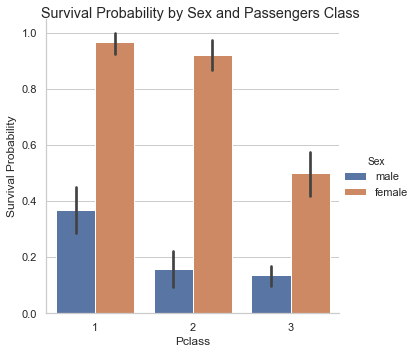

In [21]:
g = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=train_dataset, kind = "bar")
g.set_ylabels("Survival Probability")
g.fig.suptitle("Survival Probability by Sex and Passengers Class")

#### - Histogram
Histograms can help you understand the distribution of a given field of the data set. <br>
Usually, histograms are more useful when used with categorical data, in order to investigate how classes in the field are distributed. In fact, if we want to use fields of continuous numeric type we must first create classes that group each value or discretize the continuous values by creating ranges (or classes) of values. To do this, the values of a field are usually divided into a series of consecutive intervals of equal length that do not overlap. These intervals will become the "categories".<br>
To create a histogram with MatPlotLib through Pandas, you need to use the **.plot.hist()** method, which can be used with either a *series* or a *dataframe*.

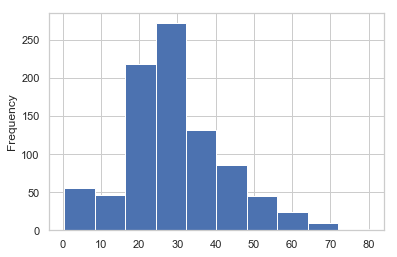

In [22]:
train_dataset.Age.plot.hist()

If you want to consider the relative frequency rather than the absolute frequency, just use the parameter *density=True*. 

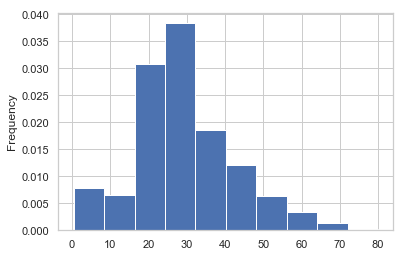

In [23]:
train_dataset.Age.plot.hist(density=True)

There are many parameters that can be assigned to the .plot.hist() function; many can be found at the following [online documentation](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist). <br>
Knowing how a field is distributed is very useful, because some machine learning models expect the data provided to be distributed in a normal way. <br>
With seaborn there are many ways to create a histogram (*distplot*), at the following [link](https://seaborn.pydata.org/examples/distplot_options.html) you can see some interesting examples.

Text(0.5,1,'Distribution plot of Fares')

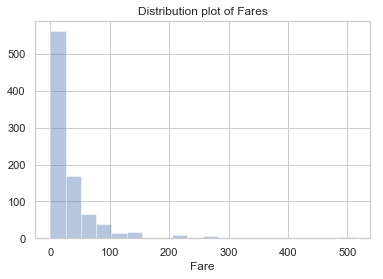

In [24]:
# Distribution plot of Fares
g = sns.distplot(train_dataset["Fare"], bins = 20, kde=False)
g.set_title("Distribution plot of Fares")

#### - 2D Scatter Plot

Scatter plots are used to identify any correlation between two fields in a dataset. In this case, unlike histograms, both fields shown on the axes (x and y) must be numeric. It is not necessary that they are of a continuous numeric type but it is sufficient that they are of a discrete type that can be ordered since each record will be identified in a point whose coordinates coincide with the values of the two fields used. <br>
From a scatter plot it is possible to show a negative or positive correlation or no correlation at all. <br>
The correlation can be evaluated by observing the trend of the bisector intersecting the axes of the Cartesian plane.<br>

Positive or negative correlations may also show a linear or non-linear relationship. If you can draw a straight line through the scatter plot and most points stick to it, then you can say with some degree of accuracy that there is a linear relationship between the fields used to create the scatter plot. <br>
Similarly, if it is possible to draw a curve between the points, it is possible to say that there may be a non-linear relationship between the fields. <br>
If neither a curve nor a line seems to suit the overall shape of the plotted points, then it is likely that there is neither a correlation nor a relationship between the elements, or at least there is currently insufficient information to determine the contrary. <br>

To plot a scatter plot, simply use the **.plot.scatter()** function; the latter can only be used with a *dataframe* and not with a *series*, as at least two fields are required.

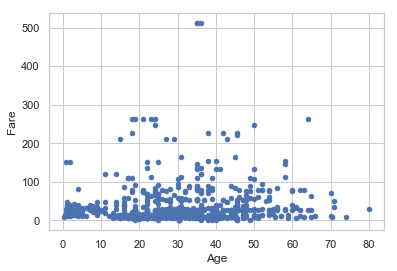

In [25]:
train_dataset.plot.scatter(x='Age', y='Fare')

From the graph above, there seems to be no relationship between the Age field and Titanic's Fare dataset.

#### - 3D Scatter Plot
3D scatter plots can be very useful when we want to investigate whether there are linear or non-linear relationships between 3 variables. 

Text(0.5,0.98,'Age x Fare x Survived')

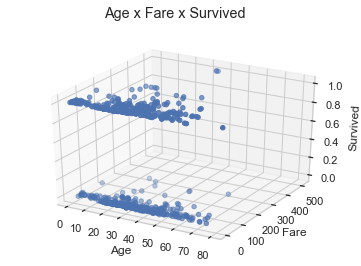

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_zlabel('Survived')

ax.scatter(train_dataset.Age, train_dataset.Fare, train_dataset.Survived)
plt.suptitle('Age x Fare x Survived')

#### - Higher Dimensionality Visualizations

In reality datasets often have dozens of fields, if not more; it is therefore insufficient to use 3D scatter plots, or not very intuitive in order to highlight any relationship between the fields. To face these problems it is possible to use the so-called "*Higher Dimensionality Visualizations*", that is graphs that try to represent the relationships between three or more variables at the same time.

**[1) Parallel Coordinates](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.plotting.parallel_coordinates.html)** <br>
The *parallel coordinates* are similar to a scatter plot, but unlike the scatters seen before, there are more vertical and parallel axes in the parallel coordinates. <br>
Each record is represented with a segment that passes through the vertical axes at the points corresponding to the value that characterizes each analyzed field. In doing so, the resulting segment completely describes a record of a dataset, identifying the value of each field observed. <br>
Parallel coordinates can be very useful when we want to represent values of more than three dimensions; however, it is not recommended to use this type of graph for more than 10 dimensions, as it may be difficult to orient between the different vertical axes. <br>
Through the parallel coordinates it is possible to verify which are the records that have a similar behavior on different fields, in this case in fact the various segments of the graph tend to group together. <br>
To use this type of chart with Pandas and MatPlotLib, you need to specify a feature (which can also be non-numeric) for which to group the various fields of the dataset. In this way, each distinct value of that characteristic is assigned a unique color when segments are plotted. <br>
In addition, to make sure that the graph is readable, it is important that the fields that are represented by the paralllel coordinates have a similar range of values, vice versa it is necessary to standardize the values of the fields before representing them on the parallel coordinates.
Below I present an example of parallel coordinates using the dataset of the plant "iris", within which there are the different measures of length and width of the sepal and petal of the different categories of plant *iris* that exist.

In [9]:
# Let's load the default Sklearn dataset where there are different parameters (date, features_names, target_names, DESCR)
data = load_iris() 
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [10]:
# I capture in the dataframe df the data concerning the length and width of the sepals and petals 
df = pd.DataFrame(data.data, columns=data.feature_names) 
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
# Target names of the different Iris plant species
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [41]:
# Column indicating with 0, 1, 2 the type of plant for each dataset record
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [42]:
# I add the column 'target_names' to the dataset df
df['target_names'] = [data.target_names[i] for i in data.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


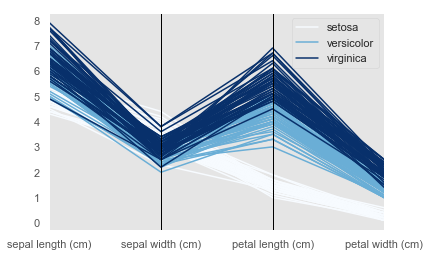

In [50]:
plt.figure()
parallel_coordinates(df, 'target_names', colormap='Blues')

In this graph we can see how, among the various species of the Iris plant some characteristics have the same behaviour (range of values) as for example the parameter "*sepal width (cm)*". Moreover it is possible to notice how the versicolor and virginica species tend to have *petal lenght (cm)* values closer to each other than those of the silky species.

**[2) Andrew's Curve](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.plotting.andrews_curves.html)** <br>
The Andrews curve, helps to visualize multivariate data, tracing each observation of the dataset as a curve. <br>
For each record, the values of the fields in the dataset act as coefficients of the curve representing the record itself; therefore observations with similar characteristics tend to cluster closer to each other. <br>
For this reason, Andrews' curves can be useful in outlier detection. <br>
As with parallel coordinates graphs, each element drawn must be numeric. <br>
We use the same dataset used for the parallel coordinates but this time we depict an Andrew's Curve:

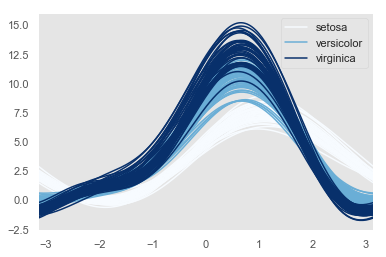

In [52]:
plt.figure()
andrews_curves(df, 'target_names', colormap='Blues')

**[3) Imshow](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html)** <br>
The **imshow** command generates an image based on the normalized values stored in a matrix.<br>.
The properties of the generated image will depend on the size and content of the input array:

- An array size [X, Y] will produce a grayscale image.
- An array size [X, Y, 3] will produce a color image, where: 1 channel will be for red, 1 for green and 1 for blue;
- A size matrix [X, Y, 4] produces a color image as before, with an additional channel for alpha (the color gradient)

The *.imshow()* method is mainly used when calculating correlations between several variables. Correlation values can vary from -1 to 1, where 1 means that two variables are perfectly correlated positively and have identical slopes for all values; while -1 means that variables are perfectly correlated negatively, and have a negative slope, but still linear. Values closer to 0 mean that there is little or no linear relationship between the two variables. <br>
The correlation matrix is symmetrical because the correlation between two elements X and Y is, of course, identical to that of the elements Y and X. Moreover, the scale is invariant because even if one element is measured in inches and the other in centimeters, the correlation is a measure purified by the unit of measurement of the variables that are taken into account.
The correlation matrix, as well as the covariance matrix, is useful to verify how the variance of a certain characteristic (dataset variable/field) is explained by the variance of another characteristic, and to verify how much new information each characteristic provides. <br>
We provide a practical example, calculating the correlation matrix from a series of random numbers:

In [58]:
df_2 = df.loc[:, ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
df_2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [59]:
df_2.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.109369,0.871754,0.817954
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544
petal length (cm),0.871754,-0.420516,1.000000,0.962757
petal width (cm),0.817954,-0.356544,0.962757,1.000000


Looking at the data from the matrix above can be a bit tedious, but you can get around this problem by viewing the correlation matrix by plotting a graph with the .imshow() method:

([<matplotlib.axis.YTick at 0x22fc14da780>,
 <a list of 4 Text yticklabel objects>)

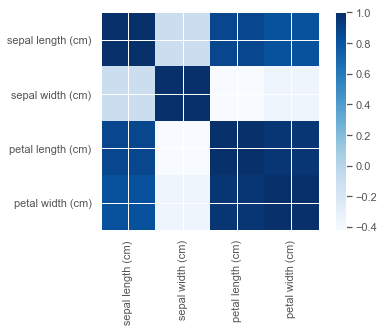

In [60]:
plt.imshow(df_2.corr(), cmap = plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(df_2.columns))]
plt.xticks(tick_marks, df_2.columns, rotation='vertical')
plt.yticks(tick_marks, df_2.columns)

**Useful Link:**
- [The Art of Effective Visualization of Multi-dimensional Data](https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57)
- [Choosing the Best Graph Type](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/DataPresentation/DataPresentation7.html)

[Click here to come back to index](#start)<a id='start'></a>